# 確率変数の収束

確率変数の列$\{X_n\}$がある確率変数$Y$に**概収束**するとは、
$$
P(\lim_{n \rightarrow \infty} X_n = Y) = 1
$$
が成り立つことと定義する。つまり確率1出収束するということである。  
ただし、実際の証明は難しいので、以下の**確率収束**を用いることが多い。  
$\{X_n\}$が$Y$に確率収束するとは、任意の$\varepsilon>0$に対して、
$$
\lim_{n \rightarrow \infty} P(|X_n-Y|> \varepsilon) = 0
$$
が成り立つことと定義する。概収束する確率変数列は確率収束することが知られている。  
また、$\{X_n\}$が$Y$に**平均二乗収束**するとは、
$$
\lim_{n \rightarrow \infty} E[(X_n-Y)^2] = 0
$$
が成り立つことと定義する。平均二乗収束する確率変数列は確率収束することが知られている。  

# 大数の弱法則

$\{X_n\}$は独立同一分布に従い、$E[X_n]=\mu$と$V[X_n]=\sigma^2$であるとする。  
この時、$X_1,X_2,...,X_n$の標本平均
$$
\bar{X_n} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$
は$n \rightarrow \infty$のもとで、$\mu$に平均二乗収束する。  
この定理を**大数の弱法則**という。

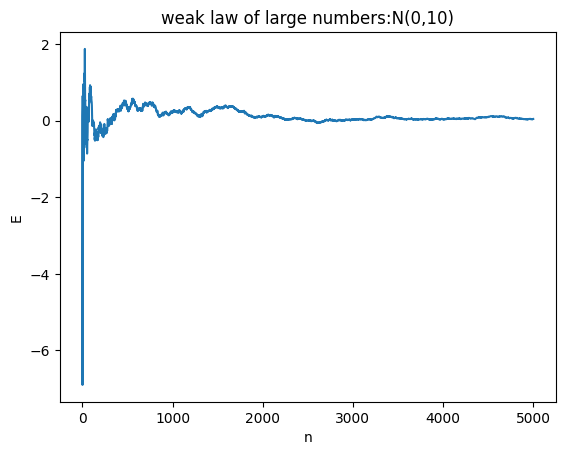

In [1]:
# 大数の弱法則を確認
import numpy as np
import matplotlib.pyplot as plt

sample_size = 5000
myu = 0
sigma = 10

rv_list = []
mean_list = []
for i in range(sample_size):
    rand_data = np.random.normal(myu, sigma, 1)
    rv_list.append(rand_data)
    mean_list.append(np.mean(rv_list))
plt.plot(np.arange(len(mean_list)),mean_list)
plt.title(f"weak law of large numbers:N({myu},{sigma})")
plt.xlabel("n")
plt.ylabel("E")
plt.show()

nが増えるほど0に収束していくことがわかる。

# 確率分布の収束

確率変数列$\{X_n\}$を考え、$X_n$の分布関数を$F_n(x)=P(X_n \leq x)$と表す。  
このとき、$\{X_n\}$がある確率分布$G$に**分布収束**あるいは、**法則収束**するとは、
$$
\lim_{n \rightarrow \infty} F_n(x) = G(x)
$$
という式が、$G$のすべての連続点$x$において成立することと定義する。  
分布収束は確率変数そのものの収束ではなく、文字通り分布の収束を表している。

# 少数法則

確率変数$X_n$が試行回数$n$、成功確率$\frac{\lambda}{n}$の二項分布
$$
P(Xn=x) = {}_n C_x \left(\frac{\lambda}{n} \right)^x \left(1-\frac{\lambda}{n} \right)^{n-x}
$$
に従うとする。ただし、$\lambda > 0$は定数である。このとき$x$を固定して、$n \rightarrow \infty$とすると
$$
\lim_{n \rightarrow \infty} P(X_n=x) = \frac{\lambda^x}{x!} e^{-\lambda}
$$
となることが示される。つまり、$X_n$はポワソン分布に分布収束する。これをポワソンの**少数法則**という。

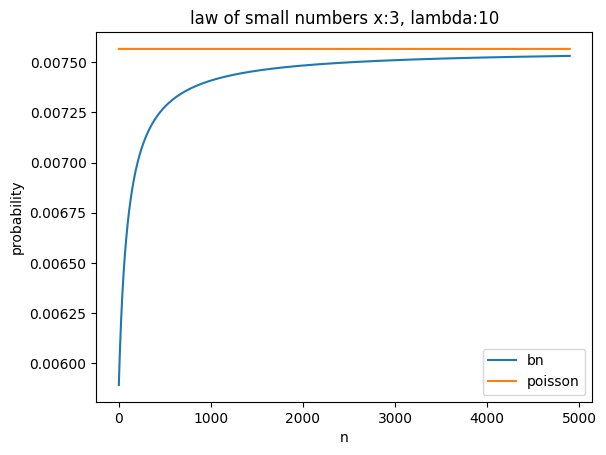

In [2]:
# ポワソンの少数法則を実践
from scipy.stats import binom
from scipy.stats import poisson

lmd = 10
num_start = 100
num_end = 5000

x_num = 3

bn_list = []
for i in range(num_start, num_end):
    f = binom(i, lmd/i)
    y = f.pmf(x_num)
    bn_list.append(y)

prob = poisson.pmf(k=x_num, mu=lmd)

plt.plot(np.arange(len(bn_list)), bn_list, label="bn")
plt.plot(np.arange(len(bn_list)), [prob]*len(bn_list), label="poisson")
plt.title(f"law of small numbers x:{x_num}, lambda:{lmd}")
plt.ylabel("probability")
plt.xlabel("n")
plt.legend()
plt.show() 

$n$が増えるごとにポワソン分布の値に収束していくことがわかる。

# 中心極限定理

$\{X_n\}$は平均$\mu$、分散$\sigma^2$の独立同一分布に従うと仮定する。  
また$X1,...,X_n$の標本平均を$\bar{X}_n$とあらわす。  
このとき、$\sqrt{n}(\bar{X}_n - \mu)$は正規分布$N(0, \sigma^2)$に分布収束する。これを**中心極限定理**という。  
要するに、母集団がどのような分布をしていても、そこから取り出した標本の平均値の分布は、平均を計算する回数が大きくなるにつれて正規分布に近づくことを意味する

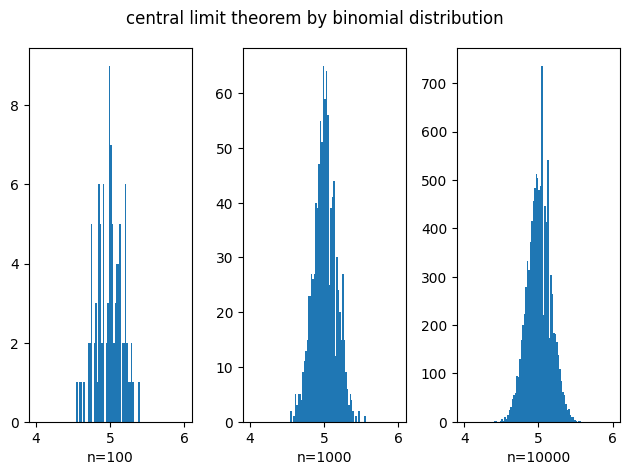

In [3]:
# 二項分布で実験してみる
start_point = 4
end_point = 6

sample_num = 100

bins1=100
bins2=1000
bins3=10000

mean_list1 = []
for i in range(bins1):
    arr = np.random.binomial(10, 0.5, sample_num)
    mean = arr.mean()
    mean_list1.append(mean)

mean_list2 = []
for i in range(bins2):
    arr = np.random.binomial(10, 0.5, sample_num)
    mean = arr.mean()
    mean_list2.append(mean)

mean_list3 = []
for i in range(bins3):
    arr = np.random.binomial(10, 0.5, sample_num)
    mean = arr.mean()
    mean_list3.append(mean)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
ax1.hist(mean_list1, range=[start_point, end_point], bins=sample_num)
ax2.hist(mean_list2, range=[start_point, end_point], bins=sample_num)
ax3.hist(mean_list3, range=[start_point, end_point], bins=sample_num)
ax1.set_xlabel(f"n={bins1}")
ax2.set_xlabel(f"n={bins2}")
ax3.set_xlabel(f"n={bins3}")
plt.suptitle("central limit theorem by binomial distribution")
plt.tight_layout()
plt.show()

# 極値分布

標本の最大値あるいは最小値が従う分布、およびその極値のことを**極値分布**という。  
収束先としては、ガンベル分布、フレシェ分布、ワイブル分布がある

# 分布収束の性質

分布収束に関する便利な性質を3つ述べる

### <性質1>

$X_n$が$X$に分布収束し、かつ$h$が連続であれば$h(X_n)$は$h(X)$に分布収束する。これを**連続写像定理**とよぶ。  
たとえば、$X_n$が$N(0,1)$に分布収束するならば、$X_n^2$は自由度1のカイ二乗分布に分布収束する。
 
### <性質2>

$X_n$が$X$に分布収束し、かつ$Y_n$が定数$c$に確率収束するならば、$X_n+Y_n$および$X_n Y_n$はそれぞれ$X+c$および$cX$に収束する。  
これを**スルツキーの補題**とよぶ。

### <性質3>

$X_n$のモーメント母関数$M_n(t) \rightarrow M(t)$が成り立つならば、$X_n \rightarrow X$に分布収束する。

# デルタ法

$\{X_n\}$は平均$\mu$、分散$\sigma^2$の独立同一分布に従うと仮定する。  
また$X_1,...,X$n$の標本平均を$\bar{X}_n$とあらわす。  
いま、ある関数$f$を用いて、$f(\bar{X}_n)$と表される量を考える。  
このような量は推測統計における推定量や検定統計量としてしばしば現れる。  
このとき、$\sqrt{n}(f(\bar{X}_n)-f(\mu))$の分布収束先を求める方法が**デルタ法**である。  
$f(x)$が連続微分可能であれば、テイラーの定理から
$$
f(\bar{X}_n)-f(\mu) \approx f'(\mu)(\bar{X}_n-\mu)
$$
と近似できる。ただし、$f'(x)$は$f(x)$の導関数を表す。  
中心極限定理から$\sqrt{n}(\bar{X}_n - \mu)$は$N(0,\sigma^2)$に収束するので、上記を用いて、$\sqrt{n}(f(\bar{X}_n)-f(\mu))$は$N(0, f'(\mu)^2 \sigma^2)$に分布収束するといえる。

In [5]:
# デルタ法を実践
def func(x):
    return x**2

def func_diff(x):
    return 2*x

mu = 10
sigama = 1
arr = np.random.normal(mu, sigma, 10000)
mean = arr.mean()

# f(Xn_avg)-f(μ)
left_val = func(mean) - func(mu)

# f'(μ)*(Xn_avg-μ)
right_val = func_diff(mu)*(mean-mu)
print(left_val, right_val)

0.6404878048760025 0.6394655145153649


近似していることが確認できる。

# 多次元の分布収束

多次元の確率変数の場合も分布収束が成立する。  
2次元の確率変数ベクトルの列$(X_1,Y_1),(X_2,Y_2),...,(X_n,Y_n)$を考え、累積分布関数を$F_n(x,y) = P(X_n \leq x, Y_n \leq y)$とおく。  
このとき$\{(X_n,Y_n)\}$が$G$に収束するとは
$$
\lim_{n \rightarrow \infty} F_n(x,y) = G(x,y)
$$
という式が$G$のすべての連続点$(x,y)$において成立することと定義する。  
なお、$X_n$と$Y_n$が同時に分布収束したとしても、$\{X_n,Y_n\}$が同時分布に収束するとは限らない。  
周辺分布だけでは、同時分布は特定できないためである。ただし、$X_n,Y_n$が独立であれば収束先も独立となる。